<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 9 PCVK (TUGAS PRAKTIKUM)**

**1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.**

**Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.**

In [8]:
#Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt


**3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)**

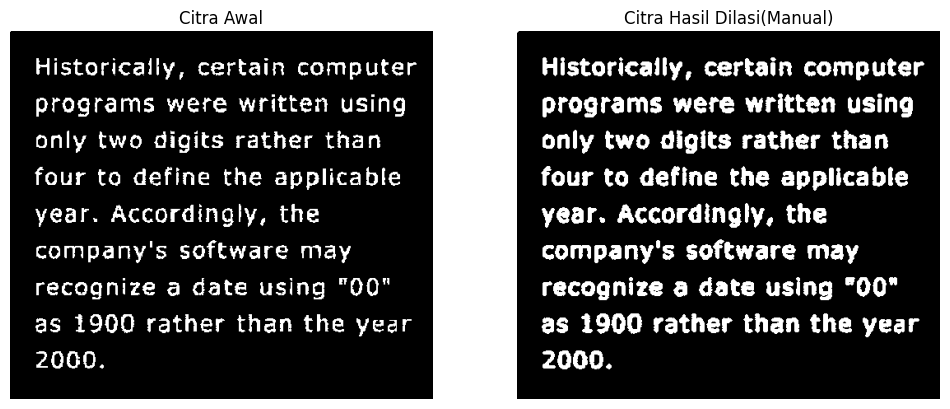

In [9]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/morphology.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Menggunakan Otsu's Binarization untuk hasil citra awal yang lebih bersih
_, img_binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Membuat Structuring Element (SE) berbentuk cross 3x3
se_cross_3x3 = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

# ungsi Dilasi Manual
def dilasi_manual(image, kernel):
    """
    Fungsi ini melakukan operasi dilasi secara manual.
    - image: citra biner input.
    - kernel: structuring element (SE) yang digunakan.
    """
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_h, pad_w = k_rows // 2, k_cols // 2

    # Siapkan kanvas output dan gambar yang sudah diberi padding
    output_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Lakukan perulangan untuk setiap piksel
    for i in range(img_rows):
        for j in range(img_cols):
            # Ambil area di bawah kernel
            region = padded_image[i:i + k_rows, j:j + k_cols]

            # Jika ada minimal satu piksel putih yang cocok dengan SE,
            # warnai piksel output menjadi putih.
            if np.any((region == 255) & (kernel == 1)):
                output_image[i, j] = 255

    return output_image

# Terapkan Fungsi dan Tampilkan Hasil
hasil_dilasi = dilasi_manual(img_binary, se_cross_3x3)

plt.figure(figsize=(12, 6))

# Menampilkan gambar pertama (Citra Awal)
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Menampilkan gambar kedua (Citra Hasil Dilasi)
plt.subplot(1, 2, 2)
plt.imshow(hasil_dilasi, cmap='gray')
plt.title('Citra Hasil Dilasi(Manual)')
plt.axis('off')

plt.show()

**4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)**

Structuring Element (SED) Cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


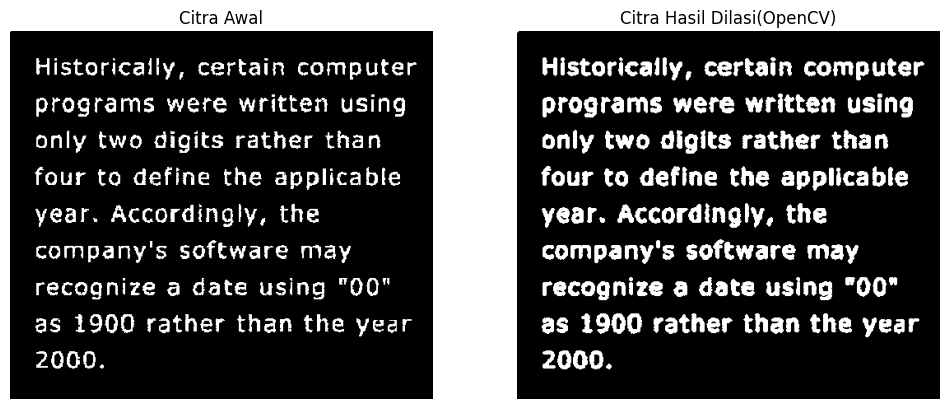

In [10]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/morphology.png'

# Membaca gambar langsung dari path dan melakukan binarisasi
img = cv2.imread(file_path, 0)
_, img_binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Membuat Structuring Element (SE) dengan OpenCV
# Gunakan cv2.getStructuringElement untuk membuat kernel berbentuk cross 3x3
kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Cetak Structuring Element Sesuai Permintaan Soal
print("Structuring Element (SED) Cross 3x3:")
print(kernel_cross_3x3)

# 5. Terapkan Fungsi Dilasi dari OpenCV
# Gunakan cv2.dilate untuk melakukan operasi dilasi
hasil_dilasi_cv = cv2.dilate(img_binary, kernel_cross_3x3, iterations=1)

# Tampilkan Hasil
plt.figure(figsize=(12, 6))

# Menampilkan gambar pertama (Citra Awal)
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Menampilkan gambar kedua (Citra Hasil Dilasi)
plt.subplot(1, 2, 2)
plt.imshow(hasil_dilasi_cv, cmap='gray')
plt.title('Citra Hasil Dilasi(OpenCV)')
plt.axis('off')

plt.show()


**5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)**

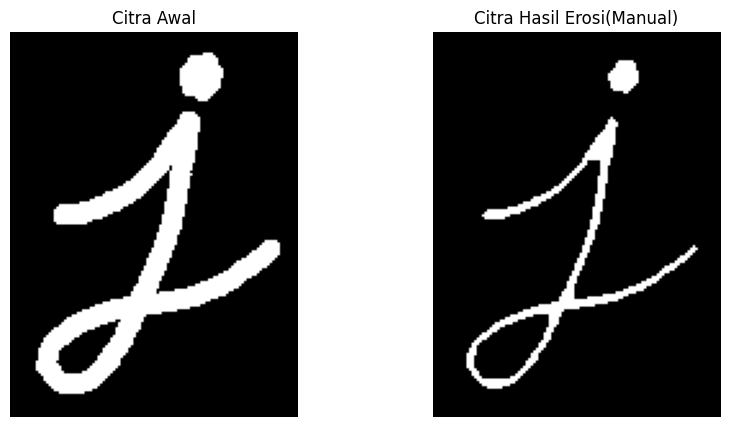

In [11]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra untuk memastikan hanya ada warna hitam dan putih
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat SE berbentuk square 5x5
se_square_5x5 = np.ones((5, 5), dtype=np.uint8)

# Menggunakan Fungsi Erosi Manual
def erosi_manual(image, kernel):
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_h, pad_w = k_rows // 2, k_cols // 2

    output_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Lakukan perulangan untuk setiap piksel
    for i in range(img_rows):
        for j in range(img_cols):
            # Ambil area di bawah kernel
            region = padded_image[i:i + k_rows, j:j + k_cols]

            # Jika SEMUA piksel di bawah kernel adalah putih,
            # warnai piksel output menjadi putih.
            if np.all(region[kernel == 1] == 255):
                output_image[i, j] = 255

    return output_image

# Terapkan Fungsi dan Tampilkan Hasil
hasil_erosi = erosi_manual(img_binary, se_square_5x5)

plt.figure(figsize=(10, 5))

# Menampilkan gambar pertama (Citra Awal)
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Menampilkan gambar kedua (Citra Hasil Erosi)
plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi, cmap='gray')
plt.title('Citra Hasil Erosi(Manual)')
plt.axis('off')

plt.show()

**6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

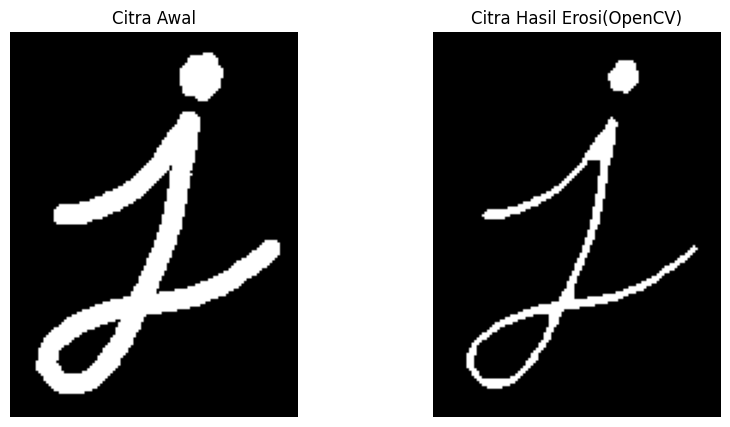

In [12]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE) dengan OpenCV
# Gunakan cv2.getStructuringElement untuk membuat kernel berbentuk persegi 5x5
kernel_square_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Terapkan Fungsi Erosi dari OpenCV
# Gunakan cv2.erode untuk melakukan operasi erosi
hasil_erosi_cv = cv2.erode(img_binary, kernel_square_5x5, iterations=1)

# Tampilkan Hasil
plt.figure(figsize=(10, 5))

# Menampilkan gambar pertama (Citra Awal)
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Menampilkan gambar kedua (Citra Hasil Erosi)
plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi_cv, cmap='gray')
plt.title('Citra Hasil Erosi(OpenCV)')
plt.axis('off')

plt.show()

**7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)**

Implementasi Opening Secara Manual


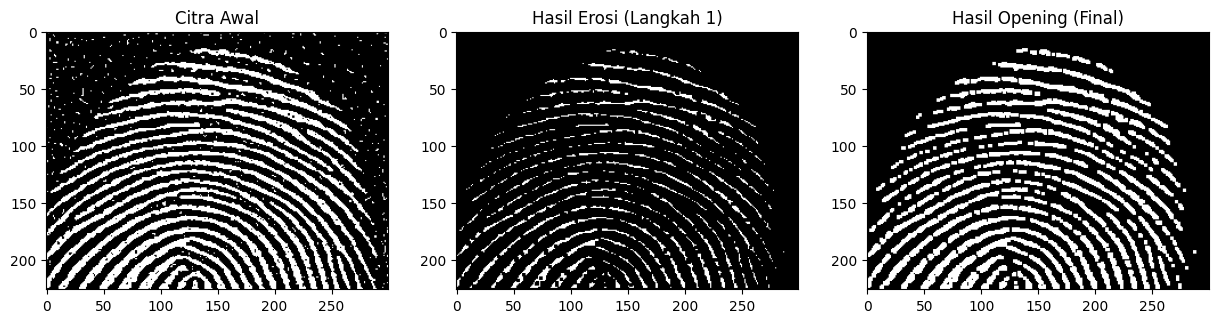

In [13]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat SE berbentuk square 3x3
se_square_3x3 = np.ones((3, 3), dtype=np.uint8)

# Fungsi Erosi dan Dilasi Manual (dari tugas sebelumnya)
def erosi_manual(image, kernel):
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_h, pad_w = k_rows // 2, k_cols // 2
    output_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for i in range(img_rows):
        for j in range(img_cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            if np.all(region[kernel == 1] == 255):
                output_image[i, j] = 255
    return output_image

def dilasi_manual(image, kernel):
    img_rows, img_cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_h, pad_w = k_rows // 2, k_cols // 2
    output_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    for i in range(img_rows):
        for j in range(img_cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            if np.any((region == 255) & (kernel == 1)):
                output_image[i, j] = 255
    return output_image

# Implementasi Opening
# Opening secara Manual (Erosi -> Dilasi)
img_erosi = erosi_manual(img_binary, se_square_3x3)
hasil_opening_manual = dilasi_manual(img_erosi, se_square_3x3)

# Tampilan untuk implementasi manual
print("Implementasi Opening Secara Manual")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(img_erosi, cmap='gray')
plt.title('Hasil Erosi (Langkah 1)')

plt.subplot(1, 3, 3)
plt.imshow(hasil_opening_manual, cmap='gray')
plt.title('Hasil Opening (Final)')
plt.show()

**8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)**

Implementasi Opening Menggunakan OpenCV


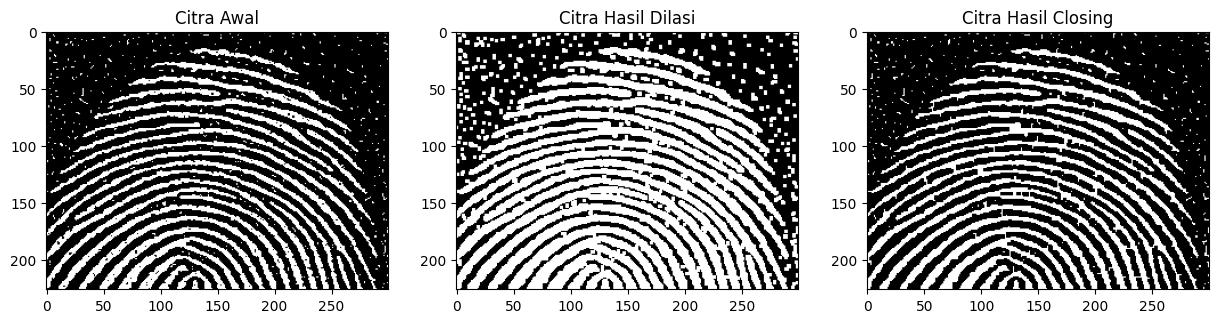

In [14]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE) dengan OpenCV
kernel_cv = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Implementasi Closing dengan OpenCV
# Lakukan dilasi terpisah HANYA untuk visualisasi langkah pertama
img_dilasi = cv2.dilate(img_binary, kernel_cv, iterations=1)

# Lakukan operasi closing secara langsung dengan cv2.morphologyEx
hasil_closing_cv = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel_cv)

# Tampilkan hasil untuk implementasi openCV
plt.figure(figsize=(15, 5))

print("Implementasi Opening Menggunakan OpenCV")
plt.subplot(1, 3, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(img_dilasi, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.subplot(1, 3, 3)
plt.imshow(hasil_closing_cv, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

**9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)**

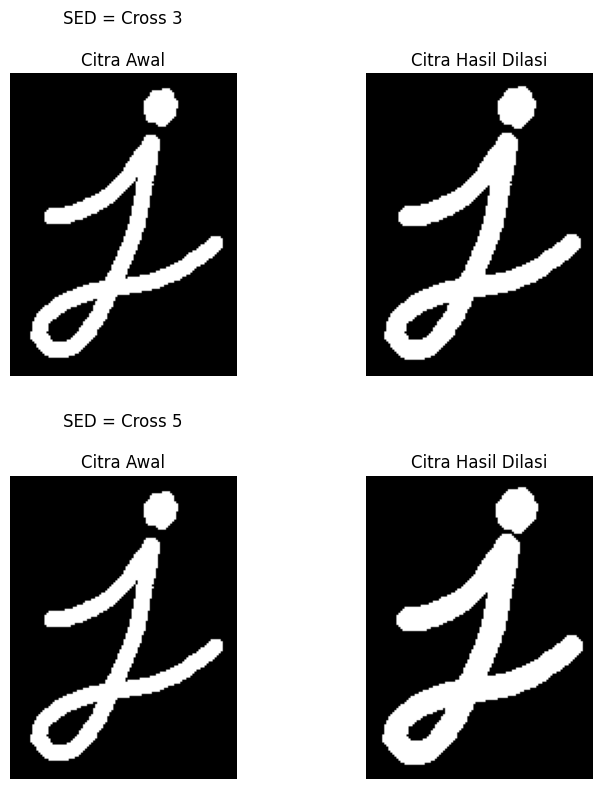

In [15]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE) dengan OpenCV
# SE berbentuk Cross ukuran 3x3
kernel_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
# SE berbentuk Cross ukuran 5x5
kernel_cross_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Terapkan Fungsi Dilasi dari OpenCV
hasil_dilasi_3x3 = cv2.dilate(img_binary, kernel_cross_3x3, iterations=1)
hasil_dilasi_5x5 = cv2.dilate(img_binary, kernel_cross_5x5, iterations=1)

# Tampilkan Hasil Sesuai Format yang Diinginkan
plt.figure(figsize=(8, 8))

# Menampilkan hasil untuk SED = Cross 3
plt.subplot(2, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('SED = Cross 3\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hasil_dilasi_3x3, cmap='gray')
plt.title('\nCitra Hasil Dilasi')
plt.axis('off')

# Menampilkan hasil untuk SED = Cross 5
plt.subplot(2, 2, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('\nSED = Cross 5\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hasil_dilasi_5x5, cmap='gray')
plt.title('\nCitra Hasil Dilasi')
plt.axis('off')

# Mengatur layout agar tidak terlalu rapat
plt.tight_layout()
plt.show()

**10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)**

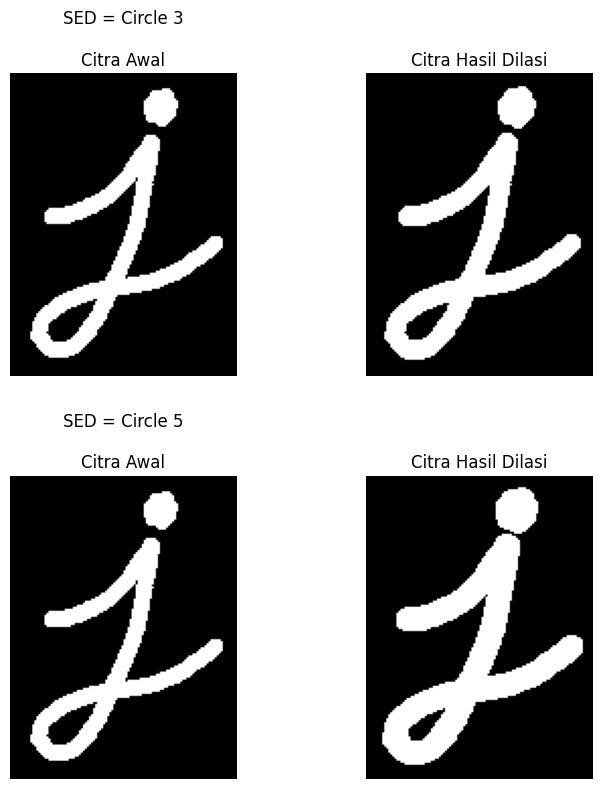

In [16]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE) dengan OpenCV
# SE berbentuk Circular (Ellipse) ukuran 3x3
kernel_circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# SE berbentuk Circular (Ellipse) ukuran 5x5
kernel_circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Terapkan Fungsi Dilasi dari OpenCV
hasil_dilasi_3x3 = cv2.dilate(img_binary, kernel_circle_3x3, iterations=1)
hasil_dilasi_5x5 = cv2.dilate(img_binary, kernel_circle_5x5, iterations=1)

# Tampilkan Hasil Sesuai Format yang Diinginkan
plt.figure(figsize=(8, 8))

# Menampilkan hasil untuk SED = Circle 3
plt.subplot(2, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('SED = Circle 3\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hasil_dilasi_3x3, cmap='gray')
plt.title('\nCitra Hasil Dilasi')
plt.axis('off')

# Menampilkan hasil untuk SED = Circle 5
plt.subplot(2, 2, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('\nSED = Circle 5\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hasil_dilasi_5x5, cmap='gray')
plt.title('\nCitra Hasil Dilasi')
plt.axis('off')

# Mengatur layout agar tidak terlalu rapat
plt.tight_layout()
plt.show()


**11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)**

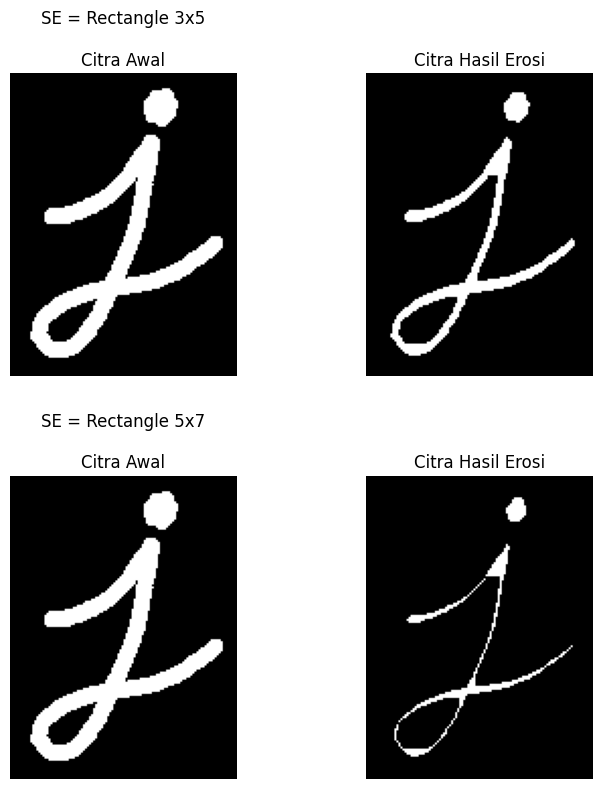

In [17]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE) dengan OpenCV
# SE berbentuk Rectangle ukuran 3x5
# Catatan: format di OpenCV adalah (width, height)
kernel_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
# SE berbentuk Rectangle ukuran 5x7
kernel_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))

# Terapkan Fungsi Erosi dari OpenCV
hasil_erosi_3x5 = cv2.erode(img_binary, kernel_rect_3x5, iterations=1)
hasil_erosi_5x7 = cv2.erode(img_binary, kernel_rect_5x7, iterations=1)

# Tampilkan Hasil Sesuai Format yang Diinginkan
plt.figure(figsize=(8, 8))

# Menampilkan hasil untuk SE = Rectangle 3x5
plt.subplot(2, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('SE = Rectangle 3x5\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hasil_erosi_3x5, cmap='gray')
plt.title('\nCitra Hasil Erosi')
plt.axis('off')

# Menampilkan hasil untuk SE = Rectangle 5x7
plt.subplot(2, 2, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('\nSE = Rectangle 5x7\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hasil_erosi_5x7, cmap='gray')
plt.title('\nCitra Hasil Erosi')
plt.axis('off')

# Mengatur layout agar tidak terlalu rapat
plt.tight_layout()
plt.show()


**12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)**

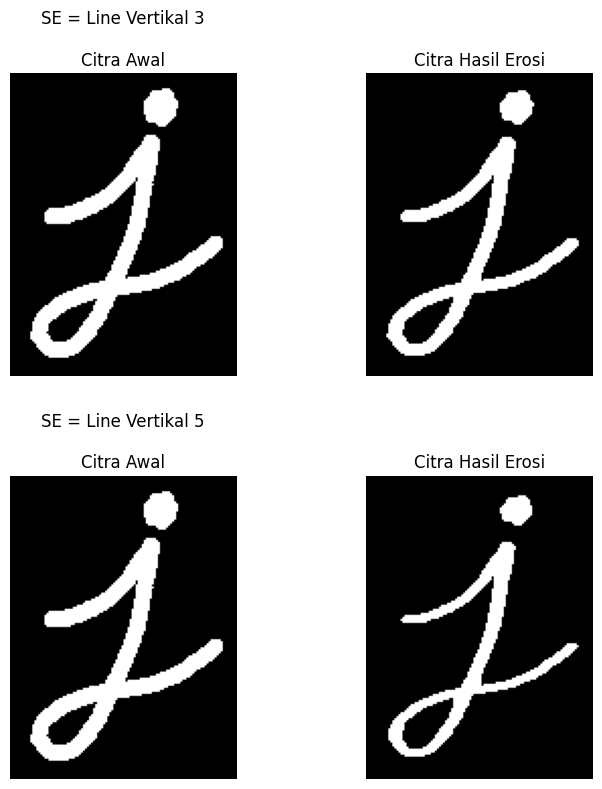

In [18]:
# Membaca file path
file_path = '/content/drive/MyDrive/PCVK/Images/j.png'

# Membaca gambar dari path
img = cv2.imread(file_path, 0)

# Binarisasi citra
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element (SE)
# OpenCV tidak memiliki bentuk garis, jadi kita buat manual dengan NumPy
# SE berbentuk Garis Vertikal panjang 3
kernel_line_v3 = np.ones((3, 1), dtype=np.uint8)
# SE berbentuk Garis Vertikal panjang 5
kernel_line_v5 = np.ones((5, 1), dtype=np.uint8)

# Terapkan Fungsi Erosi dari OpenCV
hasil_erosi_v3 = cv2.erode(img_binary, kernel_line_v3, iterations=1)
hasil_erosi_v5 = cv2.erode(img_binary, kernel_line_v5, iterations=1)

# Tampilkan Hasil Sesuai Format yang Diinginkan
plt.figure(figsize=(8, 8))

# Menampilkan hasil untuk SE = Line Vertikal 3
plt.subplot(2, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('SE = Line Vertikal 3\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hasil_erosi_v3, cmap='gray')
plt.title('\nCitra Hasil Erosi')
plt.axis('off')

# Menampilkan hasil untuk SE = Line Vertikal 5
plt.subplot(2, 2, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('\nSE = Line Vertikal 5\n\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hasil_erosi_v5, cmap='gray')
plt.title('\nCitra Hasil Erosi')
plt.axis('off')

# Mengatur layout agar tidak terlalu rapat
plt.tight_layout()
plt.show()
